<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_4_Lab_1_Preceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Module 4:** Perceptron and Gradient Descent

## **Lab 1:** Perceptron

### In this lab, we will be studying the perceptron learning algorithm

In [22]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

 We need to define a labeled data set. Toy dataset

In [23]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.


In [24]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [25]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

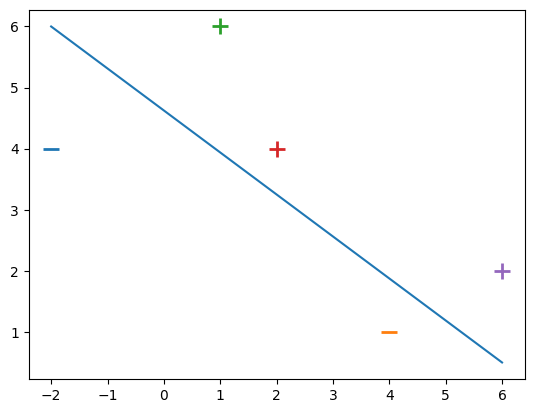

In [26]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

 We can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

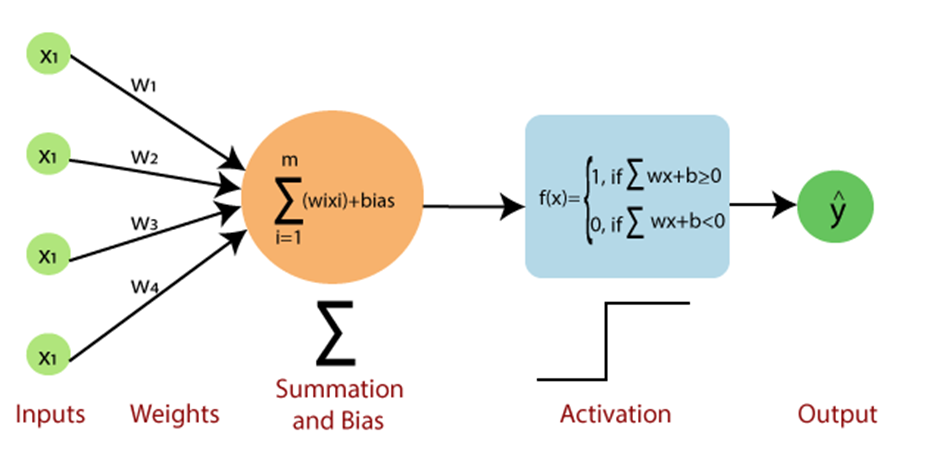

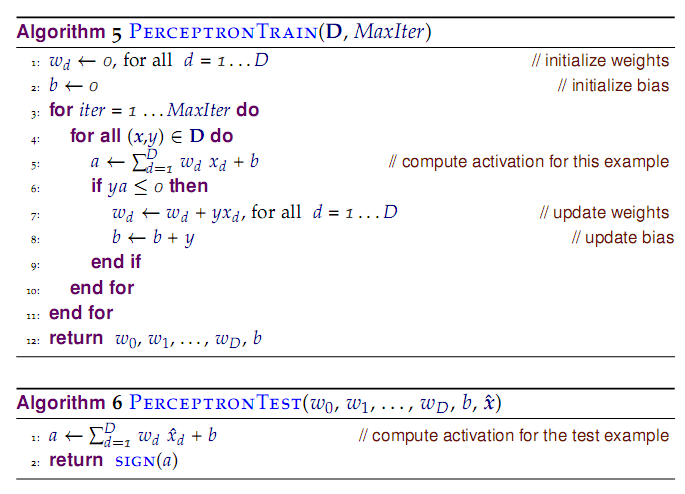

In [45]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [28]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

The training error at each epoch.

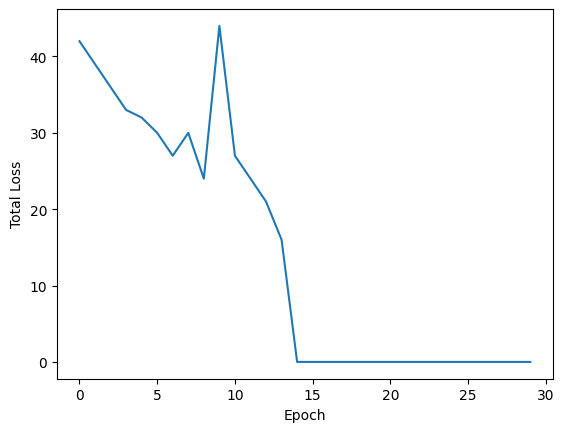

In [29]:
w = perceptron_algo_plot(X, y)

The plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

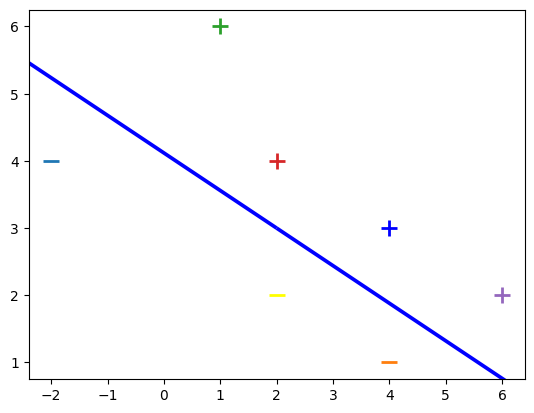

In [30]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

 The algorithm has correctly classified all the samples. The decision boundary is shown in blue.

In [31]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [32]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


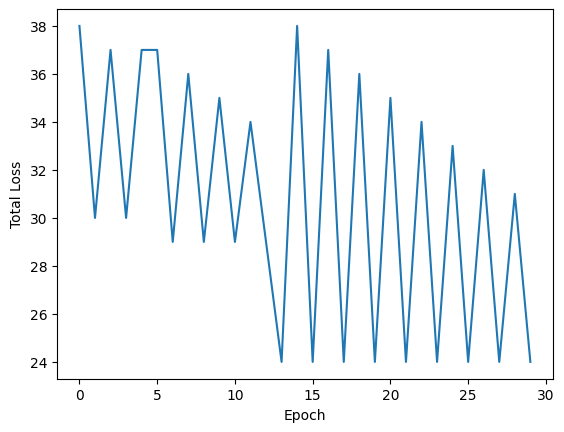

In [33]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

### **Things to try**
### 1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.


In [41]:
import pandas as pd

# Load the dataset
file_path = '/content/BankNoteAuthentication.csv'  # Replace with your file path
banknote_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Banknote Dataset Information:")
print(banknote_data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(banknote_data.head())


Banknote Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

First few rows of the dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generating a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Predicting on the test set
y_pred = perceptron.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [46]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [47]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

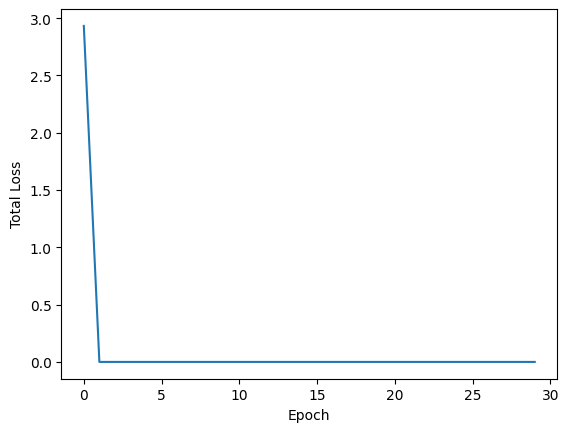

In [49]:
w = perceptron_algo_plot(X, y)

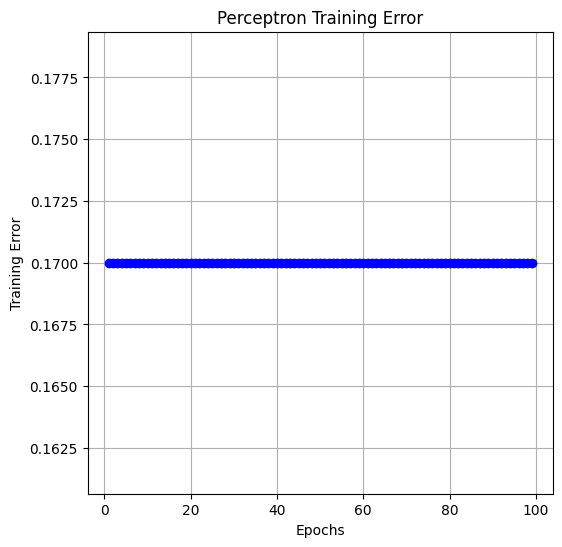

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and training the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
errors = []

for i in range(1, 100):
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_train)
    errors.append(np.mean(y_pred != y_train))

# Plotting the error convergence
plt.figure(figsize=(6, 6))
plt.plot(range(1, 100), errors, marker='o', linestyle='--', color='b')
plt.title('Perceptron Training Error')
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.grid()
plt.show()

### 2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

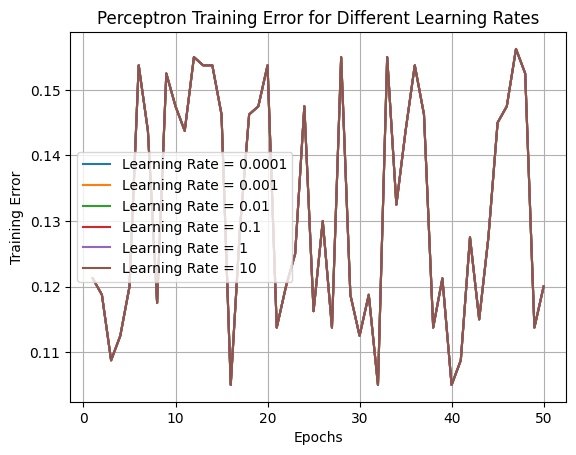

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Varying learning rates to observe convergence behavior
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
epochs = 50  # Number of epochs

for lr in learning_rates:
    perceptron = Perceptron(max_iter=epochs, eta0=lr, random_state=42)
    errors = []

    for epoch in range(epochs):
        perceptron.partial_fit(X_train, y_train, classes=np.unique(y))
        y_pred = perceptron.predict(X_train)
        errors.append(1 - accuracy_score(y_train, y_pred))

    plt.plot(range(1, epochs + 1), errors, label=f'Learning Rate = {lr}')

plt.title('Perceptron Training Error for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.legend()
plt.grid()
plt.show()


### 3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

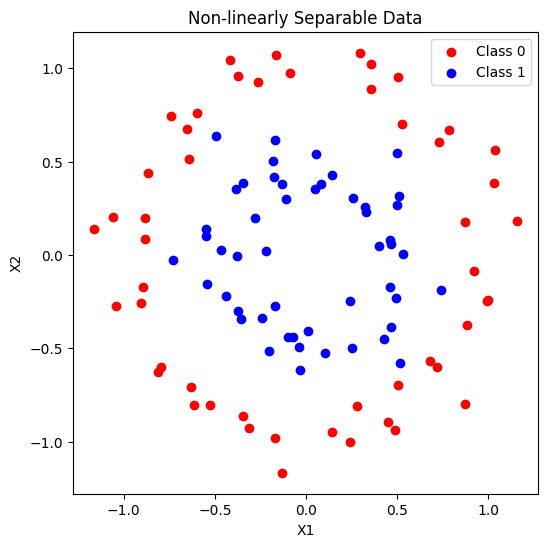

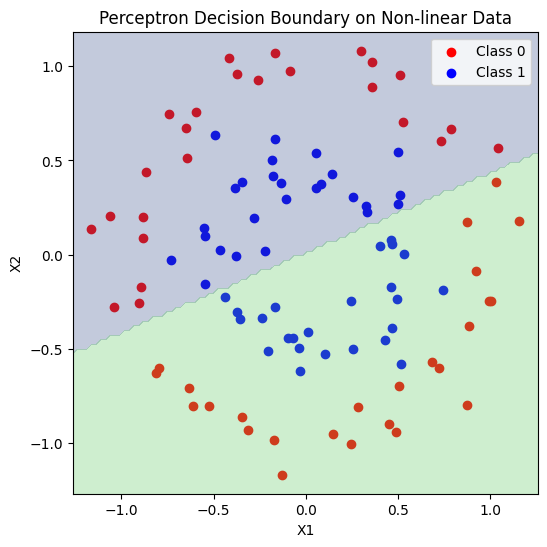

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron

# Generating a synthetic dataset that is not linearly separable
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Visualizing the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Non-linearly Separable Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Training the Perceptron model
perceptron = Perceptron(max_iter=100, random_state=42)
perceptron.fit(X, y)

# Plotting decision boundary (won't work well for non-linear data)
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Perceptron Decision Boundary on Non-linear Data')
plt.xlabel('X1')
plt.ylabel('X2')

# Plotting decision boundary won't work well for non-linear data, but attempting it for illustration
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-1, 2))
plt.legend()
plt.show()



When a toy dataset that is not linearly separable is used with the perceptron algorithm, the perceptron struggles to converge or achieve a low error rate. The perceptron algorithm is designed for linearly separable data, and when the data is not linearly separable, the algorithm won't converge to a solution.